# **Import et Sources**

## **Sources des données**


In [ ]:
# http://berkeleyearth.org/archive/data/
# https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data
# https://energydata.info/dataset?res_format=CSV


## **Import modules et dataset**


In [ ]:
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
import plotly.graph_objs as go

In [ ]:
#from google.colab import files
# data_to_load = files.upload()

In [ ]:
# Avec fichier local
# import io
# df = pd.read_csv(io.BytesIO(data_to_load['GlobalTemperatures.csv'])) 

# **Land Average Temperatures**


## **Exploration dataframe**

In [ ]:
# Avec le fichier importé dans colab
df = pd.read_csv("GlobalTemperatures.csv") 

In [ ]:
# Connaître le contenu des colonnes
for (x, int) in df.iteritems():
   print('Colunm Name : ', x)
   print('Column Contents : ', int.values)

Colunm Name :  dt
Column Contents :  ['1750-01-01' '1750-02-01' '1750-03-01' ... '2015-10-01' '2015-11-01'
 '2015-12-01']
Colunm Name :  LandAverageTemperature
Column Contents :  [ 3.034  3.083  5.626 ... 10.801  7.433  5.518]
Colunm Name :  LandAverageTemperatureUncertainty
Column Contents :  [3.574 3.702 3.076 ... 0.102 0.119 0.1  ]
Colunm Name :  LandMaxTemperature
Column Contents :  [   nan    nan    nan ... 16.45  12.892 10.725]
Colunm Name :  LandMaxTemperatureUncertainty
Column Contents :  [  nan   nan   nan ... 0.059 0.093 0.154]
Colunm Name :  LandMinTemperature
Column Contents :  [  nan   nan   nan ... 5.232 2.157 0.287]
Colunm Name :  LandMinTemperatureUncertainty
Column Contents :  [  nan   nan   nan ... 0.115 0.106 0.099]
Colunm Name :  LandAndOceanAverageTemperature
Column Contents :  [   nan    nan    nan ... 16.29  15.252 14.774]
Colunm Name :  LandAndOceanAverageTemperatureUncertainty
Column Contents :  [  nan   nan   nan ... 0.062 0.063 0.062]


In [ ]:
# Connaître le type des colonnes
df.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [ ]:
# Pour tout savoir
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [ ]:
# censé être plus complet
df.describe(include = 'all')

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3192,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
unique,3192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1970-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,NaN,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,NaN,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,NaN,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,NaN,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,NaN,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000


In [ ]:
# Supprimer les colonnes qui ne seront pas exploitées

df.drop(columns = ["LandMaxTemperature",
                   "LandAverageTemperatureUncertainty",
                   "LandMaxTemperatureUncertainty",
                   "LandMinTemperature",
                   "LandMinTemperatureUncertainty",
                   "LandAndOceanAverageTemperature",
                   "LandAndOceanAverageTemperatureUncertainty" ],
                   inplace = True)

In [ ]:
#compter le nombre d'occurence
df['LandAverageTemperature'].value_counts()

13.765    4
13.293    4
11.097    3
3.920     3
12.247    3
         ..
2.538     1
10.931    1
3.477     1
9.154     1
14.750    1
Name: LandAverageTemperature, Length: 2850, dtype: int64

In [ ]:
# compter le nombre de NaN dans la colonne
df['flag'] = df['LandAverageTemperature'].isna()
df['flag'].value_counts()

False    3180
True       12
Name: flag, dtype: int64

In [ ]:
# Afficher combien de NaN y a-t-il dans la colonne
column_name = 'LandAverageTemperature'
print("I have " ,df[column_name].isna().sum(), "missing values in the column", column_name)

I have  12 missing values in the column LandAverageTemperature


In [ ]:
# Remplacer les NaN avec la valeur précédente
df['LandAverageTemperature'].bfill(inplace = True)
df['LandAverageTemperature'].value_counts()

7.839     6
0.348     5
13.293    4
13.827    4
13.765    4
         ..
10.931    1
3.477     1
9.154     1
0.715     1
14.750    1
Name: LandAverageTemperature, Length: 2850, dtype: int64

In [ ]:
# Vérifier qu'il n'y a plus de NaN
column_name = 'LandAverageTemperature'
print("I have " ,df[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column LandAverageTemperature


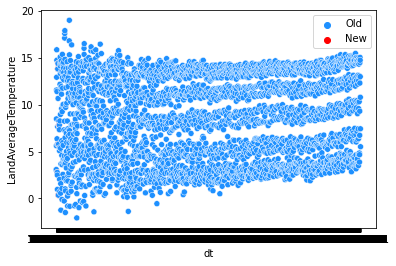

In [ ]:
# Comparer avant/ après avoir remplacé les NaN (peu concluant)
sns.scatterplot(x = "dt",
                y =  'LandAverageTemperature',
                hue = np.where(df["flag"],"New","Old"),
                palette = ['dodgerblue', 'r'],
                data = df)
plt.show()              

## **Regroup par moyenne annuelle**

In [ ]:
# convertir les valeurs de la colonne 'dt' au format datetime
datetimes = pd.to_datetime(df['dt']) 

# maj du df
df["dt"] = datetimes 

# passer la colonne dt en indexe
df = df.set_index('dt') 

In [ ]:
df.head()

,LandAverageTemperature,flag
dt,,
1750-01-01,3.034,False
1750-02-01,3.083,False
1750-03-01,5.626,False
1750-04-01,8.490,False
1750-05-01,11.573,False


In [ ]:
# DataFrameGroupBy (grouped by Year)
g = df.groupby(pd.Grouper(freq="Y"))  

In [ ]:
# maj du df avec les moyennes annuelles
df = g.mean()  

In [ ]:
df.head(1)

,LandAverageTemperature,flag
dt,,
1750-12-31,8.22375,0.083333


In [ ]:
df.tail(1)

,LandAverageTemperature,flag
dt,,
2015-12-31,9.831,0.0


## **Viz** 

In [ ]:
# définir l'indexe comme axe x
x = df.index.values 

In [ ]:
# Pour ne récuperer que l'année, pour les graphiques
dates = pd.DatetimeIndex(df.index.values)
dates.year


Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=266)

In [ ]:
"""
# Expression de la régression linéaire 
m,b=np.polyfit(x,y,1)

# Expression de la régression polynomiale
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(min, max)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()
"""

'\n# Expression de la régression linéaire \nm,b=np.polyfit(x,y,1)\n\n# Expression de la régression polynomiale\nmymodel = numpy.poly1d(numpy.polyfit(x, y, 3))\n\nmyline = numpy.linspace(min, max)\n\nplt.scatter(x, y)\nplt.plot(myline, mymodel(myline))\nplt.show()\n'

### PLT


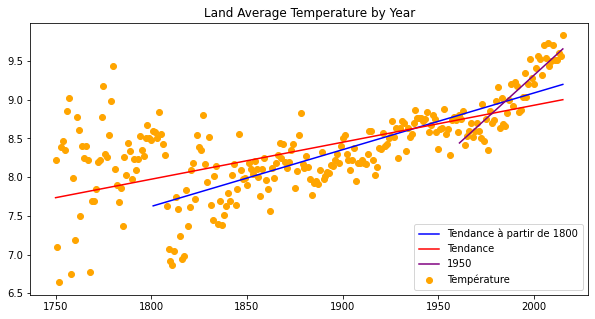

In [ ]:
# Graphique en scatterplot avec 3 régressions linéaires

# Taille du graphique

fig, ax = plt.subplots(figsize = (10,5), facecolor='w', edgecolor='k') 

# Régressions linéaires

m,b=np.polyfit(dates.year[dates.year>1800],df.tail((dates.year>1800).sum())[["LandAverageTemperature"]],1)
m2,b2=np.polyfit(dates.year,df["LandAverageTemperature"],1)
m3,b3=np.polyfit(dates.year[dates.year>1960],df.tail((dates.year>1960).sum())[["LandAverageTemperature"]],1)

# Charts

plt.scatter( x = dates.year, y = df["LandAverageTemperature"], c= 'orange'   ) 
plt.plot(dates.year[dates.year>1800],m*dates.year[dates.year>1800]+b,c="blue")
plt.plot(dates.year,m2*dates.year+b2, c = "red")
plt.plot(dates.year[dates.year>1960],m3*dates.year[dates.year>1960]+b3,c="purple")

# Titre et Légende
plt.title('Land Average Temperature by Year')
plt.legend(['Tendance à partir de 1800','Tendance','1950', 'Température'],
              loc = 'lower right', ncol = 1, scatterpoints = 1,
              frameon = True, markerscale = 1,
              borderpad = 0.5, labelspacing = 0.5)



plt.show()

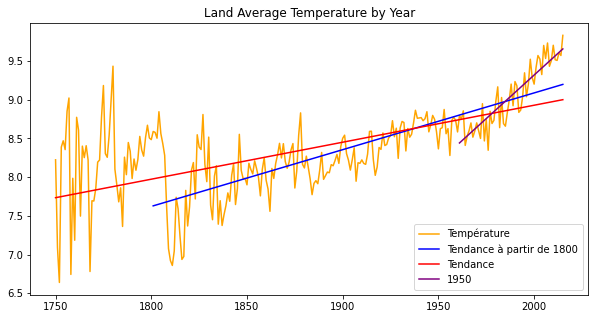

In [ ]:
# Graphique similaire mais en simple plot
fig, ax = plt.subplots(figsize = (10,5), facecolor='w', edgecolor='k') 

m,b=np.polyfit(dates.year[dates.year>1800],df.tail((dates.year>1800).sum())[["LandAverageTemperature"]],1)
m2,b2=np.polyfit(dates.year,df["LandAverageTemperature"],1)
m3,b3=np.polyfit(dates.year[dates.year>1960],df.tail((dates.year>1960).sum())[["LandAverageTemperature"]],1)

plt.plot(dates.year,df["LandAverageTemperature"],c="orange")
plt.plot(dates.year[dates.year>1800],m*dates.year[dates.year>1800]+b,c="blue")
plt.plot(dates.year,m2*dates.year+b2,c="red")
plt.plot(dates.year[dates.year>1960],m3*dates.year[dates.year>1960]+b3,c="purple")

plt.title('Land Average Temperature by Year')
plt.legend(['Température','Tendance à partir de 1800','Tendance','1950'],
              loc = 'lower right', ncol = 1, scatterpoints = 1,
              frameon = True, markerscale = 1,
              borderpad = 0.5, labelspacing = 0.5)

plt.show()

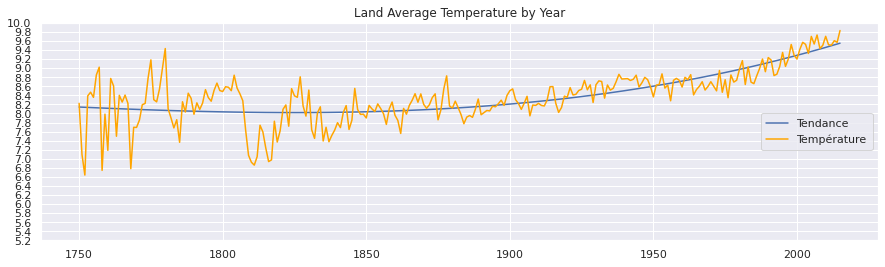

In [ ]:
# Graphique avec les mêmes données mais une régression polynomiale

fig, ax = plt.subplots(figsize = (15,4), facecolor='w', edgecolor='k') 

# Régression Polynomiale
mymodel = np.poly1d(np.polyfit(dates.year,df["LandAverageTemperature"],3))
myline = np.linspace(dates.year[0], dates.year[-1])

plt.plot(myline, mymodel(myline))

# Chart
plt.plot(dates.year,df["LandAverageTemperature"],c="orange")


# pour modifier l'échelle d'un axe avec des floats
ax.yaxis.set_ticks(np.arange(5.2, 10.2, 0.2))

plt.title('Land Average Temperature by Year')
plt.legend(['Tendance', 'Température',],
              loc = 'right', ncol = 1, scatterpoints = 1,
              frameon = True, markerscale = 1,
              borderpad = 0.5, labelspacing = 0.5)

plt.show()

### SEABORN

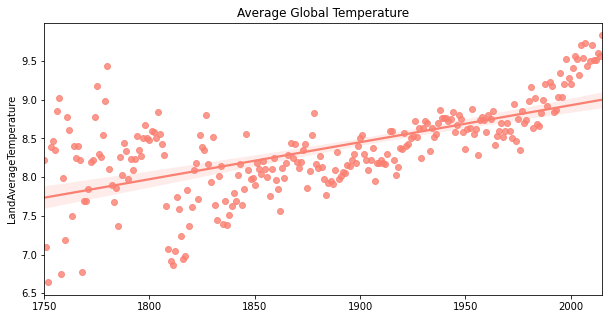

In [ ]:
# Même chose avec seaborn

fig, ax = plt.subplots(figsize = (10,5), facecolor='w', edgecolor='k')

sns.regplot(x=dates.year,
            y="LandAverageTemperature",
            color = "salmon",
            data=df)

plt.title("Average Global Temperature")

sns.set_theme()

plt.show()

### Plotly

In [ ]:
# Même chose avec plotly avec régression linéaire

fig = px.scatter(data_frame = df, 
                 x=  dates.year, 
                 y="LandAverageTemperature",
                 trendline="ols",   # régression linéaire
                 color = "LandAverageTemperature",
                 title = "Average Global Temperature",
                 labels = {'LandAverageTemperature': "Land Average Temperature",
                           "x":'Date'})

fig.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Même chose avec plotly avec régression poly

fig = px.scatter(data_frame = df, 
                 x=  dates.year, 
                 y="LandAverageTemperature",
                 trendline="lowess",  # poly reg
                 color = "LandAverageTemperature",
                 title = "Average Global Temperature",
                 labels = {'LandAverageTemperature': "Land Average Temperature",
                           "x":'Date'})

fig.show()

# **Sea Level**

## **Importation et Découverte du Dataframe**

In [ ]:
# importation du nouveau dataset sur le niveau de l'eau
df_sea = pd.read_csv('csiro_recons_gmsl_yr_2015_csv.csv')

In [ ]:
df_sea.head()

,Time,GMSL,GMSL uncertainty
0,1880-03-15,-158.7,24.2
1,1881-03-15,-153.1,24.2
2,1882-03-15,-169.9,23.0
3,1883-03-15,-164.6,22.8
4,1884-03-15,-143.7,22.2


In [ ]:
# Vérification de la présence de NaN
df_sea['flag'] = df_sea['GMSL'].isna()
df_sea['flag'].value_counts()

False    134
Name: flag, dtype: int64

## **Datetime**

In [ ]:
# Converstion de la colonne Time au format date/time
datetimes2 = pd.to_datetime(df_sea['Time'])
df_sea['Time'] = datetimes2

In [ ]:
# Pour pouvoir utiliser l'année dans le code
dates2 = pd.DatetimeIndex(df_sea['Time'])
dates2.year

Int64Index([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889,
            ...
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', name='Time', length=134)

## **Viz**

### PLT

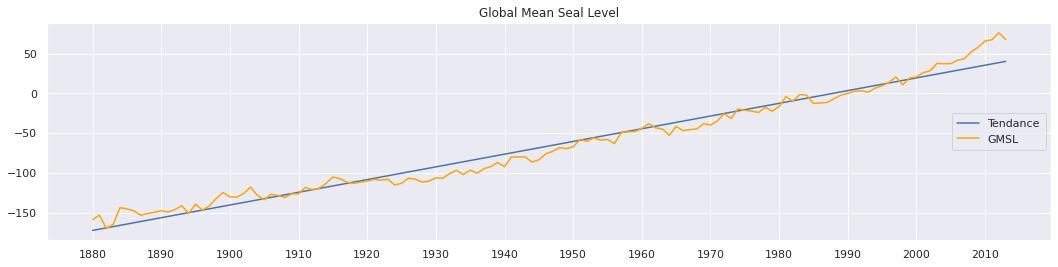

In [ ]:
# Graphique

# Dimensions 
fig, ax = plt.subplots(figsize = (18,4), facecolor='w', edgecolor='k')

# Régression linéaire
m4,b4=np.polyfit(dates2.year,df_sea["GMSL"],1)

# Représentation visuelle de la régression
plt.plot(dates2.year,m4*dates2.year+b4)

# Représentation visuelle du niveau de l'eau 
plt.plot(dates2.year,df_sea["GMSL"],c="orange")

# Modification de l'échelle
ax.xaxis.set_ticks(np.arange(dates2.year[0], dates2.year[-1], 10))

# Titre et légende (pas sûr de la pertinence)
plt.title('Global Mean Seal Level')
plt.legend(['Tendance', 'GMSL'],
              loc = 'right', ncol = 1, scatterpoints = 1,
              frameon = True, markerscale = 1,
              borderpad = 0.5, labelspacing = 0.5)


plt.show()

### SEABORN

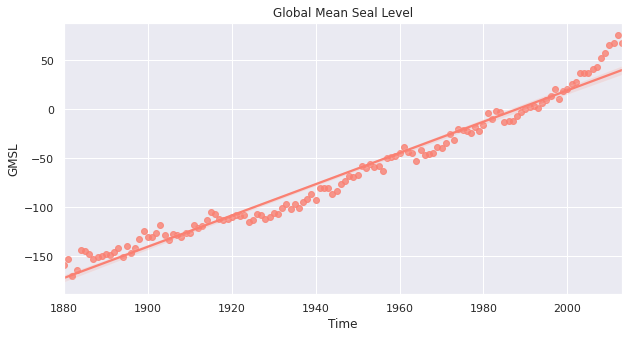

In [ ]:
# Pareil sur seaborn

fig, ax = plt.subplots(figsize = (10,5), facecolor='w', edgecolor='k')

sns.regplot(x=dates2.year,
            y="GMSL",
            color = "salmon",
            data=df_sea)

sns.set_theme()

plt.title('Global Mean Seal Level')

plt.show()

### Plotly

In [ ]:
# Pareil avec Plotly

fig = px.scatter(data_frame = df_sea, 
                 x=  dates2.year, 
                 y="GMSL",
                 trendline="ols",  
                 color = "GMSL",
                 title = "Average Global Sea Level",
                 labels = { "GMSL": "Global Mean Sea Level",
                            "x":'Date'})
                           

fig.show()

# **Air Pollution**

## Exploration & Cie

In [ ]:
# Nouveau dt sur la pollution de l'air
df_mort = pd.read_csv('number-of-deaths-by-risk-factor.csv')

In [ ]:
df_mort.info

<bound method DataFrame.info of            Entity  ... Deaths – Outdoor air pollution (all ages) (IHME)
0     Afghanistan  ...                                          4383.83
1     Afghanistan  ...                                          4426.36
2     Afghanistan  ...                                          4568.91
3     Afghanistan  ...                                          5080.29
4     Afghanistan  ...                                          5499.23
...           ...  ...                                              ...
6463     Zimbabwe  ...                                          2053.58
6464     Zimbabwe  ...                                          2030.92
6465     Zimbabwe  ...                                          1994.91
6466     Zimbabwe  ...                                          2030.88
6467     Zimbabwe  ...                                          2112.19

[6468 rows x 38 columns]>

In [ ]:
# Création d'un array du nombre de colonnes
np.arange(0,38,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [ ]:
# Suppression des colonnes qui ne m'intéressent pas
cols = [ 0,  1, 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35,37]
df_mort.drop(df_mort.columns[cols],axis=1, inplace = True)

In [ ]:
# Vérification de la présence de NaN
df_mort['flag'] = df_mort['Deaths - Air pollution - Sex: Both - Age: All Ages (Number)'].isna()
df_mort['flag'].value_counts()

False    6468
Name: flag, dtype: int64

In [ ]:
df_mort.dtypes

Year                                                             int64
Deaths - Air pollution - Sex: Both - Age: All Ages (Number)    float64
flag                                                              bool
dtype: object

In [ ]:
# convertir dt en format date/time

df_mort['Year'] = pd.to_datetime(df_mort.Year, format='%Y') 

In [ ]:
df_mort = df_mort.set_index('Year')

In [ ]:
# Group by du noumbre de morts par année
g2 = df_mort.groupby(pd.Grouper(freq="Y"))

In [ ]:
# Somme des morts par année
df_mort = g2.sum() 

In [ ]:
print(df_mort)

            Deaths - Air pollution - Sex: Both - Age: All Ages (Number)  flag
Year                                                                         
1990-12-31                                       2.195450e+07               0
1991-12-31                                       2.207937e+07               0
1992-12-31                                       2.219652e+07               0
1993-12-31                                       2.231632e+07               0
1994-12-31                                       2.234478e+07               0
1995-12-31                                       2.225852e+07               0
1996-12-31                                       2.221976e+07               0
1997-12-31                                       2.226662e+07               0
1998-12-31                                       2.223180e+07               0
1999-12-31                                       2.208930e+07               0
2000-12-31                                       2.200980e+07   

In [ ]:
dates_mort = pd.DatetimeIndex(df_mort.index.values)
dates_mort.year

Int64Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64')

In [ ]:
# Renommer la colonne car le nom est trop long
df_mort.rename(columns={"Deaths - Air pollution - Sex: Both - Age: All Ages (Number)": "Deaths",}
               , inplace = True)

## **Viz**

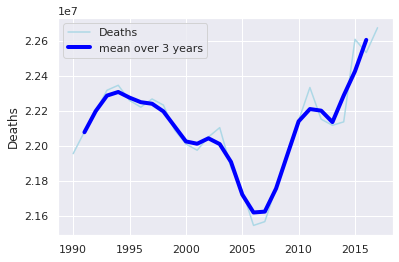

In [ ]:
sns.lineplot(x = dates_mort.year,
             y = "Deaths",
             data= df_mort,
             color="lightblue",
             label="Deaths")

sns.lineplot(x = dates_mort.year,
             y=df_mort['Deaths'].rolling(window=3,center=True).mean(),
             data=df_mort,
             linewidth =4,
             color="blue",
             label="mean over 3 years")

[Text(0.5, 0, 'Time')]

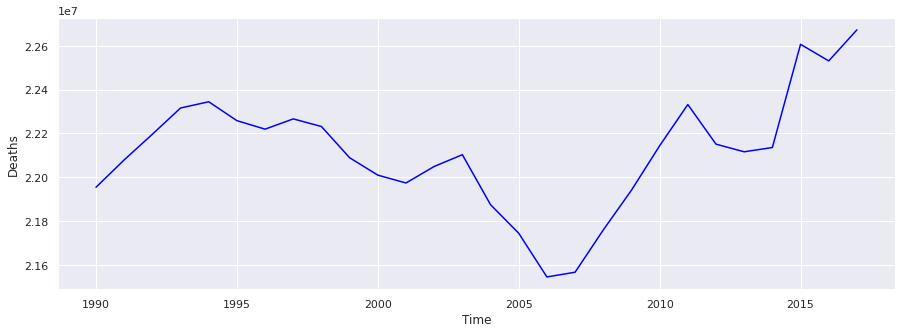

In [ ]:
fig, ax = plt.subplots(figsize = (15,5), facecolor='w', edgecolor='k')

sns.lineplot(x = dates_mort.year,
            y =  'Deaths', 
            color = 'blue',
            data = df_mort) 
ax.set(xlabel='Time') 

In [ ]:
# Graph

fig = px.line(data_frame = df_mort, 
                 x=  dates_mort.year, 
                 y="Deaths", 
                 title = "Number of deaths because of air pollution",
                 labels = {"x":'Date'})
                            
fig.update_layout(
    autosize=False,
    width=950,
    height=470)

fig.show()

# **CO2 Emissions**

## Exploration

In [ ]:
# Dataset sur les emissions de CO2
df_emission = pd.read_csv("annual-co-emissions-by-region.csv")

In [ ]:
df_emission.head()

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,0.014656
1,Afghanistan,AFG,1950,0.084272
2,Afghanistan,AFG,1951,0.091600
3,Afghanistan,AFG,1952,0.091600
4,Afghanistan,AFG,1953,0.106256


In [ ]:
# Suppression colonnes qui ne seront pas utilisées 
df_emission.drop(columns = ["Entity", "Code"] ,axis=1, inplace = True)

In [ ]:
# Vérification présence de NaN
df_emission['flag'] = df_emission['Annual CO2 emissions'].isna()
df_emission['flag'].value_counts()

False    23372
Name: flag, dtype: int64

In [ ]:
# Format datetime + group by year
df_emission['Year'] = pd.to_datetime(df_emission.Year, format='%Y') 
df_emission = df_emission.set_index('Year')
g3 = df_emission.groupby(pd.Grouper(freq="Y"))
df_emission = g3.mean()

In [ ]:
print(df_emission)

            Annual CO2 emissions   flag
Year                                   
1751-12-31              2.460665  False
1752-12-31              2.461629  False
1753-12-31              2.461629  False
1754-12-31              2.462594  False
1755-12-31              2.463558  False
...                          ...    ...
2014-12-31            797.473323  False
2015-12-31            825.061618  False
2016-12-31            828.439692  False
2017-12-31            838.705656  False
2018-12-31            854.064558  False

[268 rows x 2 columns]


In [ ]:
# Récuperer l'année pour le graph 
dates_emission = pd.DatetimeIndex(df_emission.index.values)
dates_emission.year

Int64Index([1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', length=268)

## Viz

In [ ]:
# Graph

fig = px.line(data_frame = df_emission, 
                 x=  dates_emission.year, 
                 y="Annual CO2 emissions", 
                 title = "Average Annual CO2 Emissions",
                 labels = {"x":'Date'})
                            
                           
fig.show()

# **Merge**

## Partie Fusion

In [ ]:
"""
Pour avoir rapidement le nom des df à copier/coller
df
df_sea
df_mort
df_emission
"""

'\nPour avoir rapidement le nom des df à copier/coller\ndf\ndf_sea\ndf_mort\ndf_emission\n'

In [ ]:
df_mort.info

<bound method DataFrame.info of                   Deaths  flag
Year                          
1990-12-31  2.195450e+07     0
1991-12-31  2.207937e+07     0
1992-12-31  2.219652e+07     0
1993-12-31  2.231632e+07     0
1994-12-31  2.234478e+07     0
1995-12-31  2.225852e+07     0
1996-12-31  2.221976e+07     0
1997-12-31  2.226662e+07     0
1998-12-31  2.223180e+07     0
1999-12-31  2.208930e+07     0
2000-12-31  2.200980e+07     0
2001-12-31  2.197402e+07     0
2002-12-31  2.204945e+07     0
2003-12-31  2.210318e+07     0
2004-12-31  2.187498e+07     0
2005-12-31  2.174466e+07     0
2006-12-31  2.154510e+07     0
2007-12-31  2.156668e+07     0
2008-12-31  2.175955e+07     0
2009-12-31  2.194107e+07     0
2010-12-31  2.214391e+07     0
2011-12-31  2.233215e+07     0
2012-12-31  2.215133e+07     0
2013-12-31  2.211643e+07     0
2014-12-31  2.213596e+07     0
2015-12-31  2.260713e+07     0
2016-12-31  2.253129e+07     0
2017-12-31  2.267306e+07     0>

In [ ]:
df_emission.info

<bound method DataFrame.info of             Annual CO2 emissions   flag
Year                                   
1751-12-31              2.460665  False
1752-12-31              2.461629  False
1753-12-31              2.461629  False
1754-12-31              2.462594  False
1755-12-31              2.463558  False
...                          ...    ...
2014-12-31            797.473323  False
2015-12-31            825.061618  False
2016-12-31            828.439692  False
2017-12-31            838.705656  False
2018-12-31            854.064558  False

[268 rows x 2 columns]>

In [ ]:
df.info

<bound method DataFrame.info of             LandAverageTemperature      flag
dt                                          
1750-12-31                8.223750  0.083333
1751-12-31                7.092417  0.416667
1752-12-31                6.640000  0.500000
1753-12-31                8.388083  0.000000
1754-12-31                8.469333  0.000000
...                            ...       ...
2011-12-31                9.516000  0.000000
2012-12-31                9.507333  0.000000
2013-12-31                9.606500  0.000000
2014-12-31                9.570667  0.000000
2015-12-31                9.831000  0.000000

[266 rows x 2 columns]>

In [ ]:
# Merge entre le df de la température et des émissions de CO2
df_climat = pd.merge(df, 
                  df_emission, 
                  how='right', 
                  left_on= df.index.values,
                  right_on=df_emission.index.values)

In [ ]:
# Vérification du nouveau df
df_climat.head()

,key_0,LandAverageTemperature,flag_x,Annual CO2 emissions,flag_y
0,1751-12-31,7.092417,0.416667,2.460665,False
1,1752-12-31,6.640000,0.500000,2.461629,False
2,1753-12-31,8.388083,0.000000,2.461629,False
3,1754-12-31,8.469333,0.000000,2.462594,False
4,1755-12-31,8.355583,0.000000,2.463558,False


In [ ]:
# Drop les colonnes inutiles
df_climat.drop(columns = ["flag_x", "flag_y"], inplace = True)

In [ ]:
# Rename la colonne des dates
df_climat.rename(columns={"key_0": "date"}, inplace = True)

In [ ]:
# Vérifier le contenu du df
print("My DataFrame shape is : ", df_climat.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df_climat.info())

My DataFrame shape is :  (268, 3)



Which columns have missing values ? (Non-null column)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 267
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    268 non-null    datetime64[ns]
 1   LandAverageTemperature  265 non-null    float64       
 2   Annual CO2 emissions    268 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.4 KB
None


In [ ]:
# Vérifier les Nan
df_climat['flag'] = df_climat['LandAverageTemperature'].isna()
df_climat['flag'].value_counts()

False    265
True       3
Name: flag, dtype: int64

In [ ]:
# Fill avec la valeur précédente 
df_climat['LandAverageTemperature'].bfill(inplace = True)
df_climat['LandAverageTemperature'].value_counts()

8.229167    1
8.434083    1
8.527417    1
8.100167    1
8.279583    1
           ..
8.111833    1
8.379083    1
7.853167    1
8.128917    1
6.937500    1
Name: LandAverageTemperature, Length: 265, dtype: int64

In [ ]:
# Conversion format datetime
df_climat['date'] = pd.to_datetime(df_climat["date"]) 
df_climat = df_climat.set_index('date')

In [ ]:
# Récuperer la date pour le graph
dates_climat = pd.DatetimeIndex(df_climat.index.values)
dates_climat.year

Int64Index([1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', length=268)

In [ ]:
# Pour voir la corrélation entre la température et les émission de CO2
df_climat.corr()['LandAverageTemperature'].sort_values(ascending = False)

LandAverageTemperature    1.000000
Annual CO2 emissions      0.723282
flag                           NaN
Name: LandAverageTemperature, dtype: float64

## Partie Viz

In [ ]:
# Graph température et CO2 dans le temps

fig = px.scatter(df_climat, 
                 x= dates_climat.year, 
                 y="LandAverageTemperature", 
                 color="Annual CO2 emissions",
                 trendline = 'lowess',
                 title = 'Land Average Temperature and CO2 Emissions over Time')

# fig.add_scatter(x=dates_climat.year, y=df_climat['Annual CO2 emissions'], mode='lines')

fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.



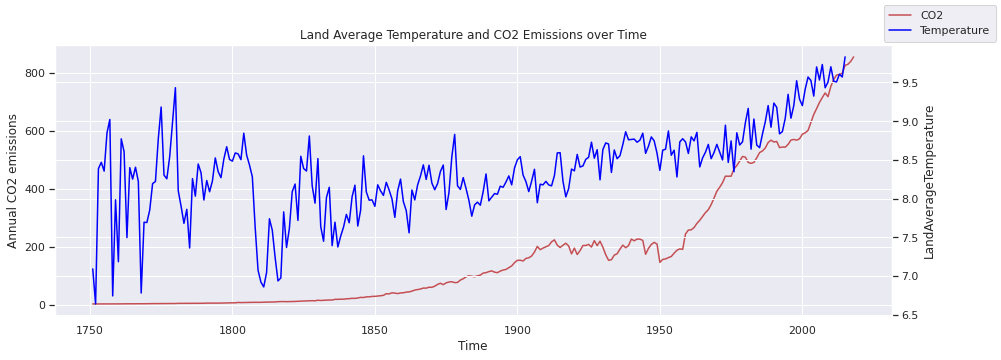

In [ ]:
# Même chose mais avec deux courbes superposées avec deux échelles différentes et adaptées

fig, ax = plt.subplots(figsize = (15,5), facecolor='w', edgecolor='k')



sns.lineplot(x = dates_climat.year,
             y =  'Annual CO2 emissions',
             color = 'r', 
             data = df_climat)

ax.twinx()

sns.lineplot(x = dates_climat.year,
            y =  'LandAverageTemperature', 
            color = 'blue',
            data = df_climat)  

ax.set(xlabel='Time')

fig.legend(['CO2', 'Temperature'],
              loc = 'best', ncol = 1, scatterpoints = 1,
              frameon = True, markerscale = 1,
              borderpad = 0.5, labelspacing = 0.5)

plt.title("Land Average Temperature and CO2 Emissions over Time")             

plt.show()

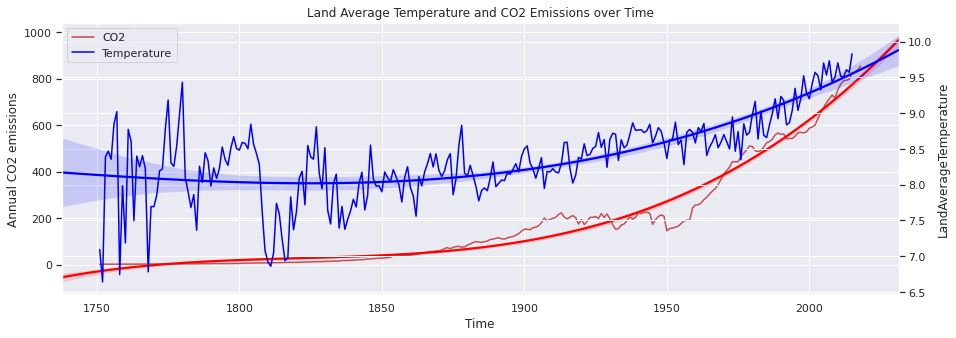

In [ ]:
fig, ax = plt.subplots(figsize = (15,5), facecolor='w', edgecolor='k')


sns.lineplot(x = dates_climat.year,
             y =  'Annual CO2 emissions',
             color = 'r',
             label = 'CO2',
             data = df_climat)

sns.regplot(x = dates_climat.year,
             y =  'Annual CO2 emissions',
             color = 'red',
             scatter = False,
             order = 3,
             truncate = False,
             data = df_climat)

ax2 = ax.twinx()

sns.lineplot(x = dates_climat.year,
            y =  'LandAverageTemperature',
            label = 'Temperature',
            color = 'blue',
            data = df_climat)  

sns.regplot(x = dates_climat.year,
            y =  'LandAverageTemperature', 
            color = 'blue',
            scatter = False,
            order = 3,
            truncate = False,
            data = df_climat) 

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# fig.legend(loc="upper left")

ax.set(xlabel='Time')

plt.title("Land Average Temperature and CO2 Emissions over Time")             


plt.show()

<Figure size 720x360 with 0 Axes>

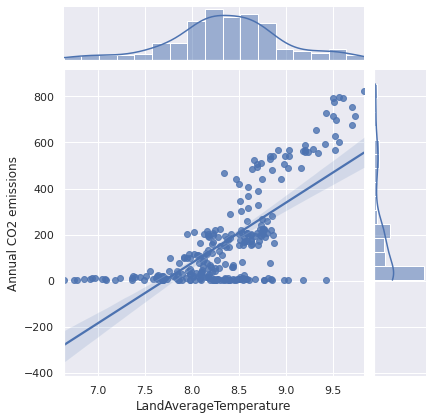

In [ ]:
# Jointploit entre le temp et le C02 avec une régression

plt.figure(figsize = (10,5), facecolor='w', edgecolor='k')

sns.jointplot(data=df_climat,
              x="LandAverageTemperature",
              y="Annual CO2 emissions",
              kind = 'reg')

sns.set_theme()

plt.show()